# Sesi 9 Fundamental Time Series

# Penjelasan singkat tentang data

you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

In [16]:
!pip install statsmodels

In [17]:
# Import library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Prepared Dataset

In [18]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [19]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [20]:
df_transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [21]:
# count jumlah store_nbr
df_transactions['store_nbr'].value_counts()

39    1678
38    1678
26    1678
31    1678
33    1678
34    1678
37    1678
27    1677
28    1677
32    1677
23    1677
40    1677
41    1677
44    1677
45    1677
46    1677
47    1677
48    1677
50    1677
51    1677
49    1677
2     1677
16    1677
5     1677
54    1676
3     1676
4     1676
6     1676
8     1676
9     1676
19    1676
35    1676
13    1676
1     1676
15    1676
11    1676
10    1675
7     1675
17    1674
43    1672
30    1655
14    1638
12    1616
25    1615
24    1577
18    1566
36    1551
53    1167
20     909
29     874
21     748
42     720
22     671
52     118
Name: store_nbr, dtype: int64

In [22]:
# Rubah tipe data date
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


# EDA

<Axes: xlabel='date', ylabel='transactions'>

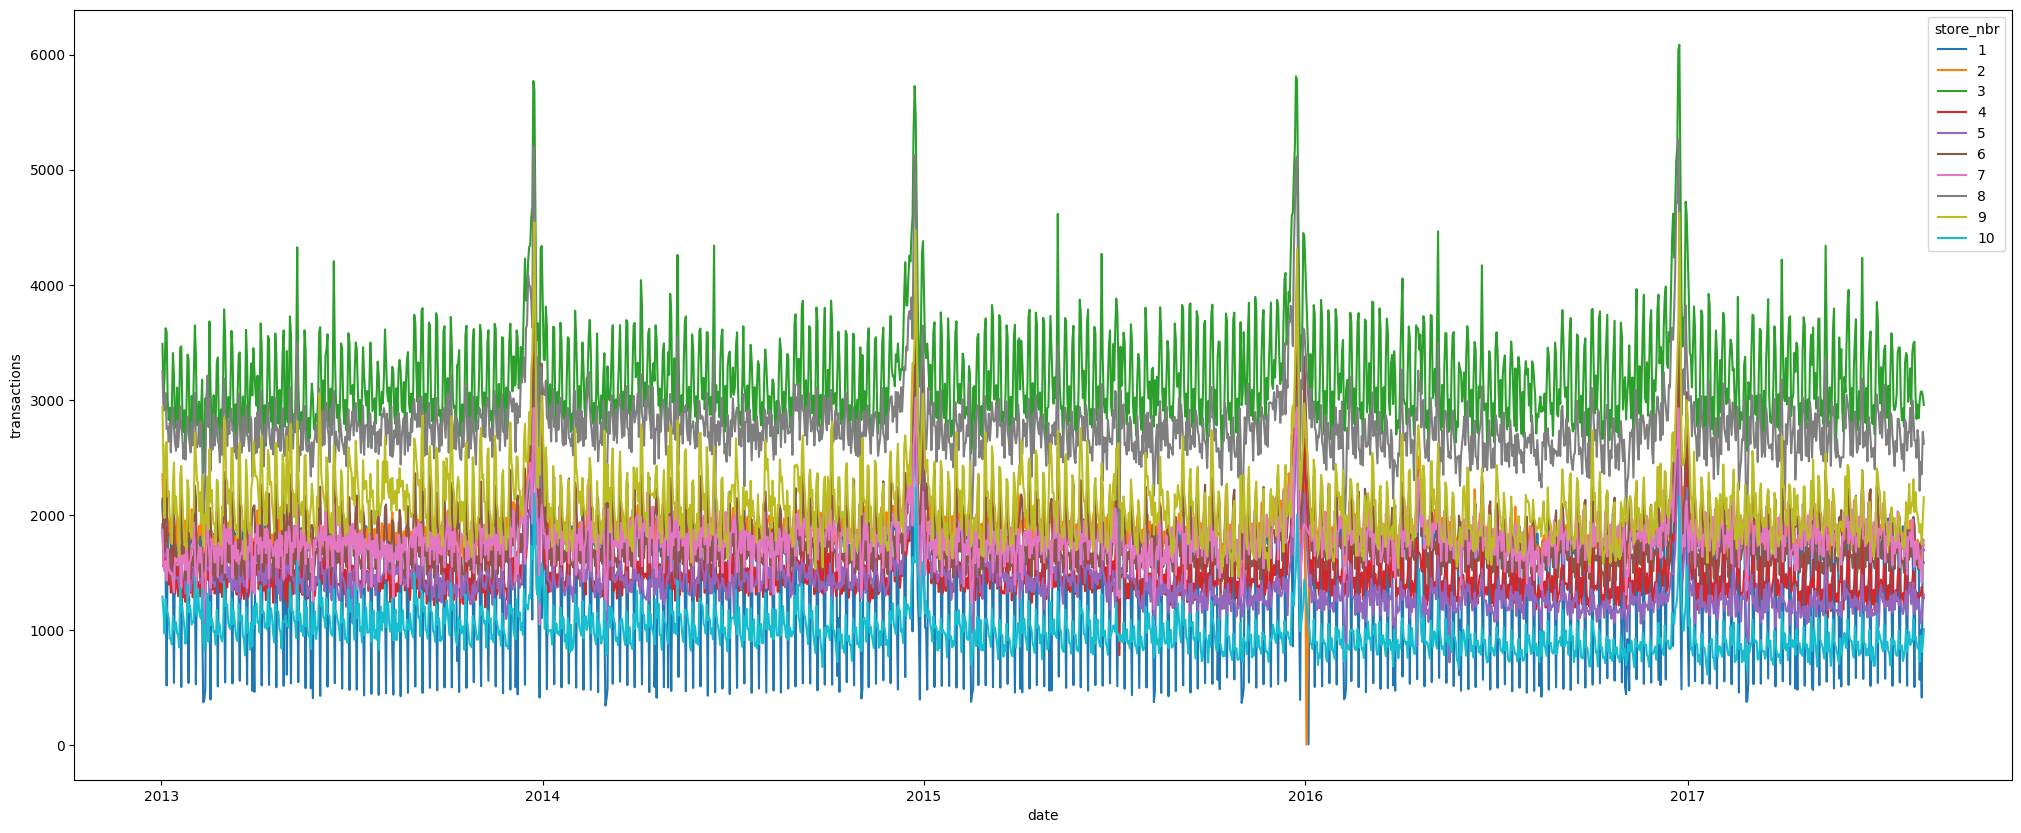

In [23]:
# Pick 10 store_nbr
df_transactions_ten_store = df_transactions[df_transactions['store_nbr'].isin([1,2,3,4,5,6,7,8,9,10])]

# seasonal plot, different the colour
plt.figure(figsize=(25, 10))
sns.lineplot(data=df_transactions_ten_store, x='date', y='transactions', hue='store_nbr', palette='tab10')

<ipython-input-24-ce05427d477d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_store1['date'] = pd.to_datetime(df_transactions_store1['date'])


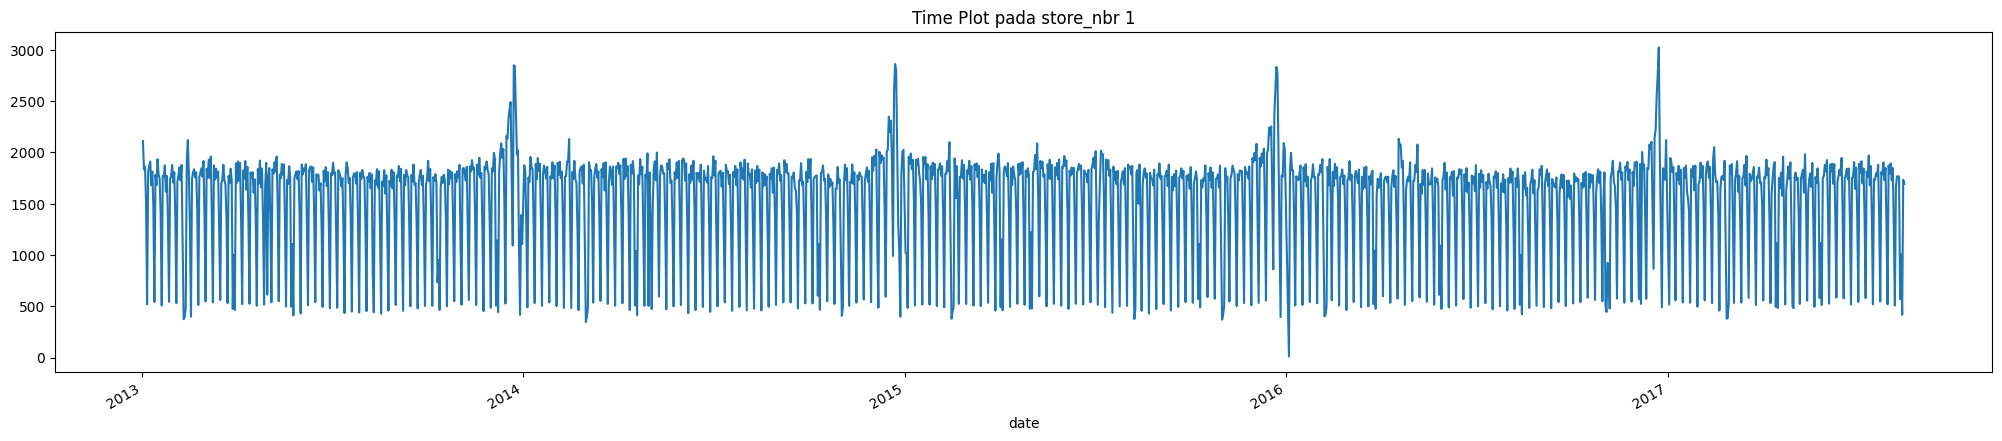

In [24]:
# Time Plot pada store_nbr 1
fig, ax = plt.subplots(figsize=(25, 5))
df_transactions_store1 = df_transactions[df_transactions['store_nbr'] == 1]
df_transactions_store1['date'] = pd.to_datetime(df_transactions_store1['date'])
df_transactions_store1.set_index('date', inplace=True)
df_transactions_store1['transactions'].plot()
plt.title('Time Plot pada store_nbr 1')
plt.show()

In [25]:
# Membagi data berdasarkan tahun, bulan, minggu, hari, dan hari dalam seminggu
df_transactions_store1['year'] = df_transactions_store1.index.year
df_transactions_store1['month'] = df_transactions_store1.index.month
df_transactions_store1['week'] = df_transactions_store1.index.week
df_transactions_store1['day'] = df_transactions_store1.index.day
df_transactions_store1['weekday'] = df_transactions_store1.index.weekday

df_transactions_store1

<ipython-input-25-9efdc6840a37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_store1['year'] = df_transactions_store1.index.year
<ipython-input-25-9efdc6840a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_store1['month'] = df_transactions_store1.index.month
<ipython-input-25-9efdc6840a37>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and

,store_nbr,transactions,year,month,week,day,weekday
date,,,,,,,
2013-01-02,1,2111,2013,1,1,2,2
2013-01-03,1,1833,2013,1,1,3,3
2013-01-04,1,1863,2013,1,1,4,4
2013-01-05,1,1509,2013,1,1,5,5
2013-01-06,1,520,2013,1,1,6,6
...,...,...,...,...,...,...,...
2017-08-11,1,570,2017,8,32,11,4
2017-08-12,1,1004,2017,8,32,12,5
2017-08-13,1,416,2017,8,32,13,6


In [27]:
df_transactions_store1.head(15)

,store_nbr,transactions,year,month,week,day,weekday
date,,,,,,,
2013-01-02,1,2111,2013,1,1,2,2
2013-01-03,1,1833,2013,1,1,3,3
2013-01-04,1,1863,2013,1,1,4,4
2013-01-05,1,1509,2013,1,1,5,5
2013-01-06,1,520,2013,1,1,6,6
2013-01-07,1,1807,2013,1,2,7,0
2013-01-08,1,1869,2013,1,2,8,1
2013-01-09,1,1910,2013,1,2,9,2
2013-01-10,1,1679,2013,1,2,10,3


<ipython-input-30-6ff5e22ae31b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='transactions', data=df_transactions_store1, palette='viridis')


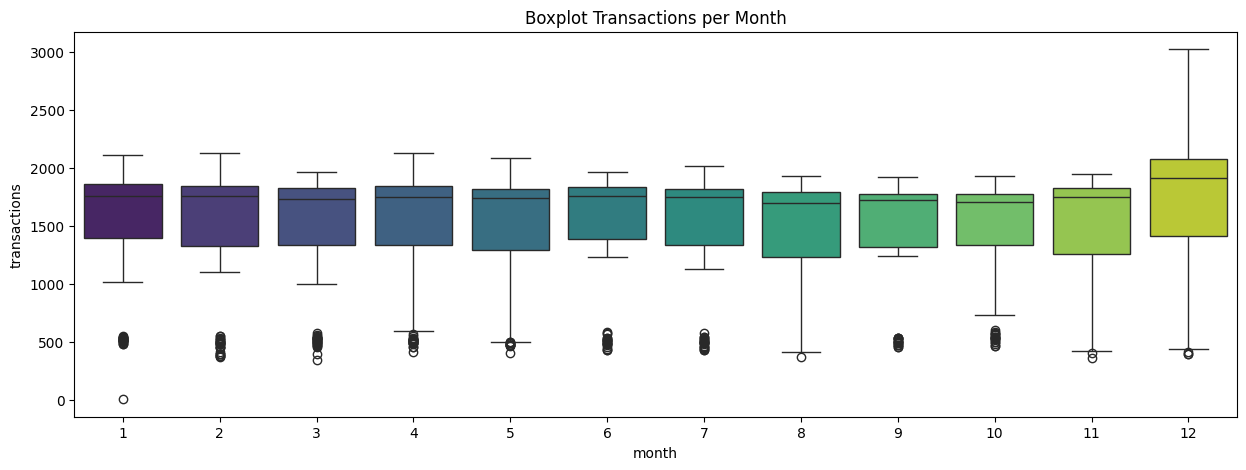

In [30]:
# Visualisasi data berdasarkan bulan dengan boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='month', y='transactions', data=df_transactions_store1, palette='viridis')
plt.title('Boxplot Transactions per Month')
plt.show()

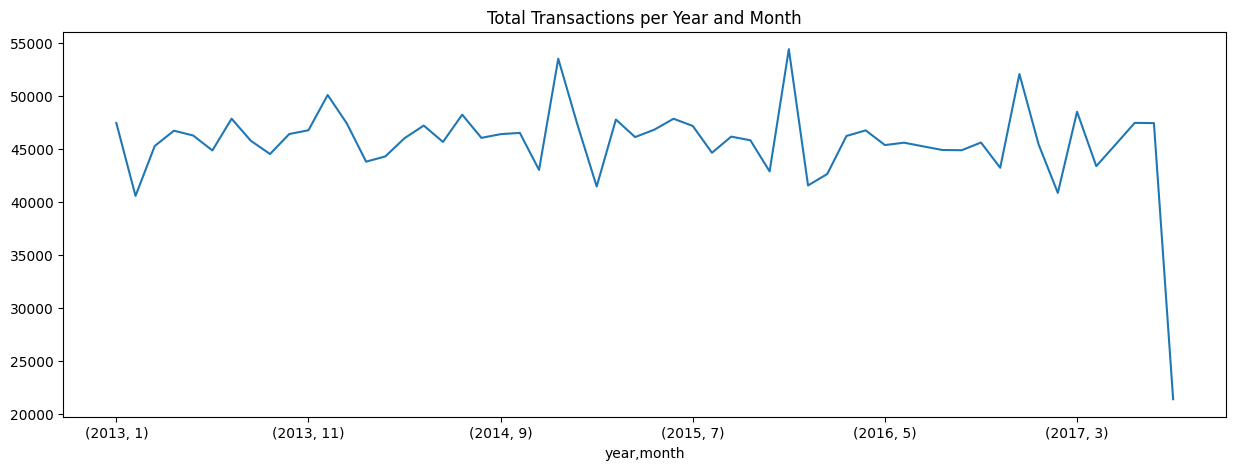

In [31]:
# Membuat total transaksi per tahun dan bulan
df_transactions_store1.groupby(['year', 'month'])['transactions'].sum()

# Membuat visualisasi data berdasarkan tahun dan bulan
plt.figure(figsize=(15, 5))
df_transactions_store1.groupby(['year', 'month'])['transactions'].sum().plot()
plt.title('Total Transactions per Year and Month')
plt.show()

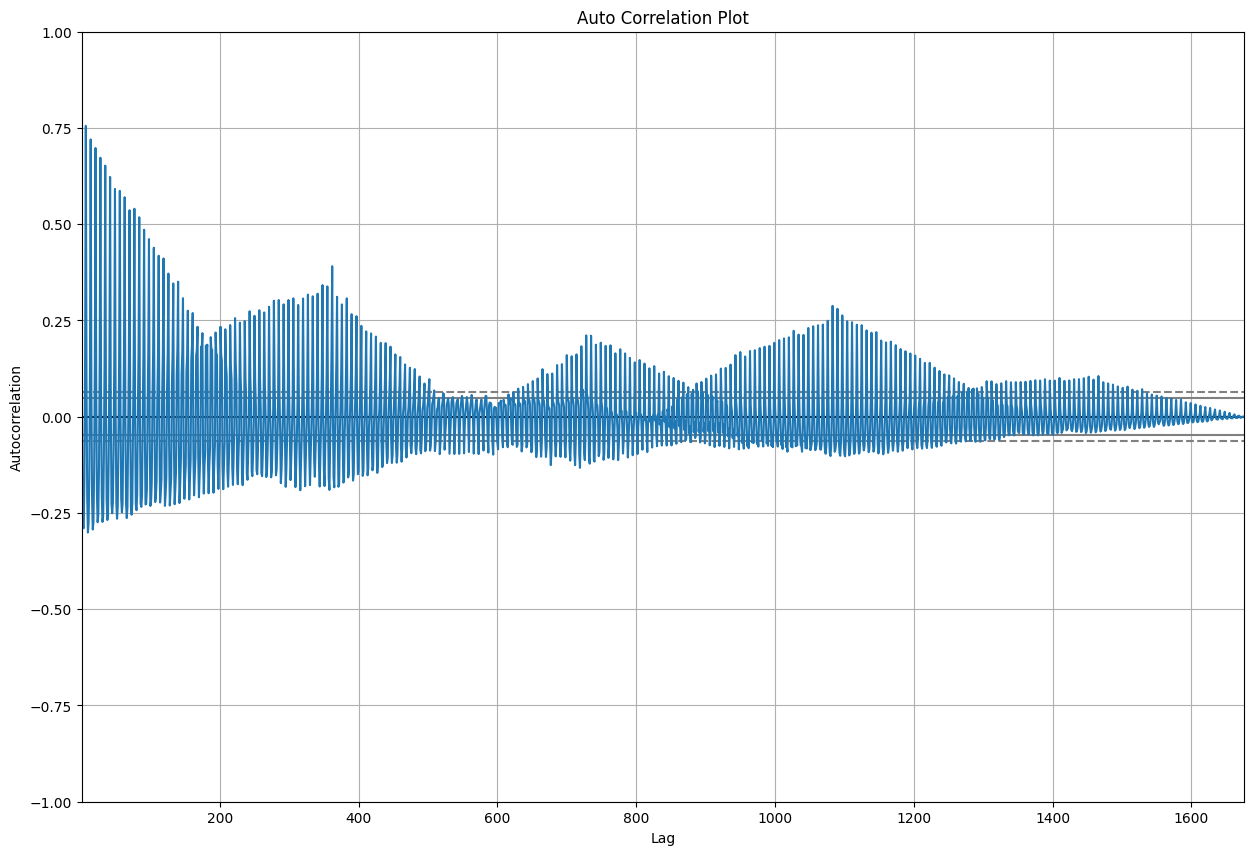

In [32]:
# Auto Correlation Plot
plt.figure(figsize=(15, 10))
autocorrelation_plot(df_transactions_store1['transactions'])
plt.title('Auto Correlation Plot')
plt.show()

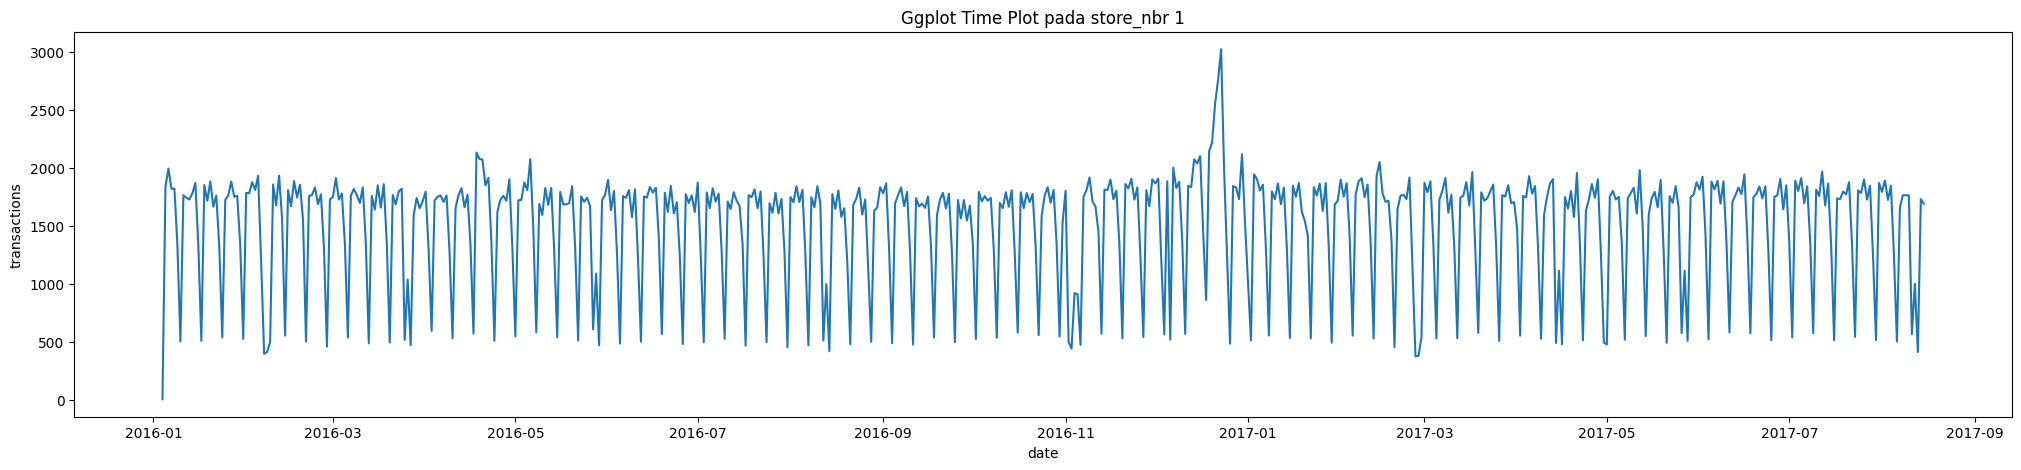

In [33]:
# Membatasi pengamatan dari 2016 hingga 2017
df_transactions_store1_2016_2017 = df_transactions_store1['2016':'2017']

# Ggplot Time Plot pada store_nbr 1
plt.figure(figsize=(25, 5))
sns.lineplot(x='date', y='transactions', data=df_transactions_store1_2016_2017)
plt.title('Ggplot Time Plot pada store_nbr 1')
plt.show()

In [34]:
df_transactions_store1_2016_2017

,store_nbr,transactions,year,month,week,day,weekday
date,,,,,,,
2016-01-04,1,10,2016,1,1,4,0
2016-01-05,1,1840,2016,1,1,5,1
2016-01-06,1,1996,2016,1,1,6,2
2016-01-07,1,1822,2016,1,1,7,3
2016-01-08,1,1823,2016,1,1,8,4
...,...,...,...,...,...,...,...
2017-08-11,1,570,2017,8,32,11,4
2017-08-12,1,1004,2017,8,32,12,5
2017-08-13,1,416,2017,8,32,13,6


# Decomposition

<Figure size 2500x1500 with 0 Axes>

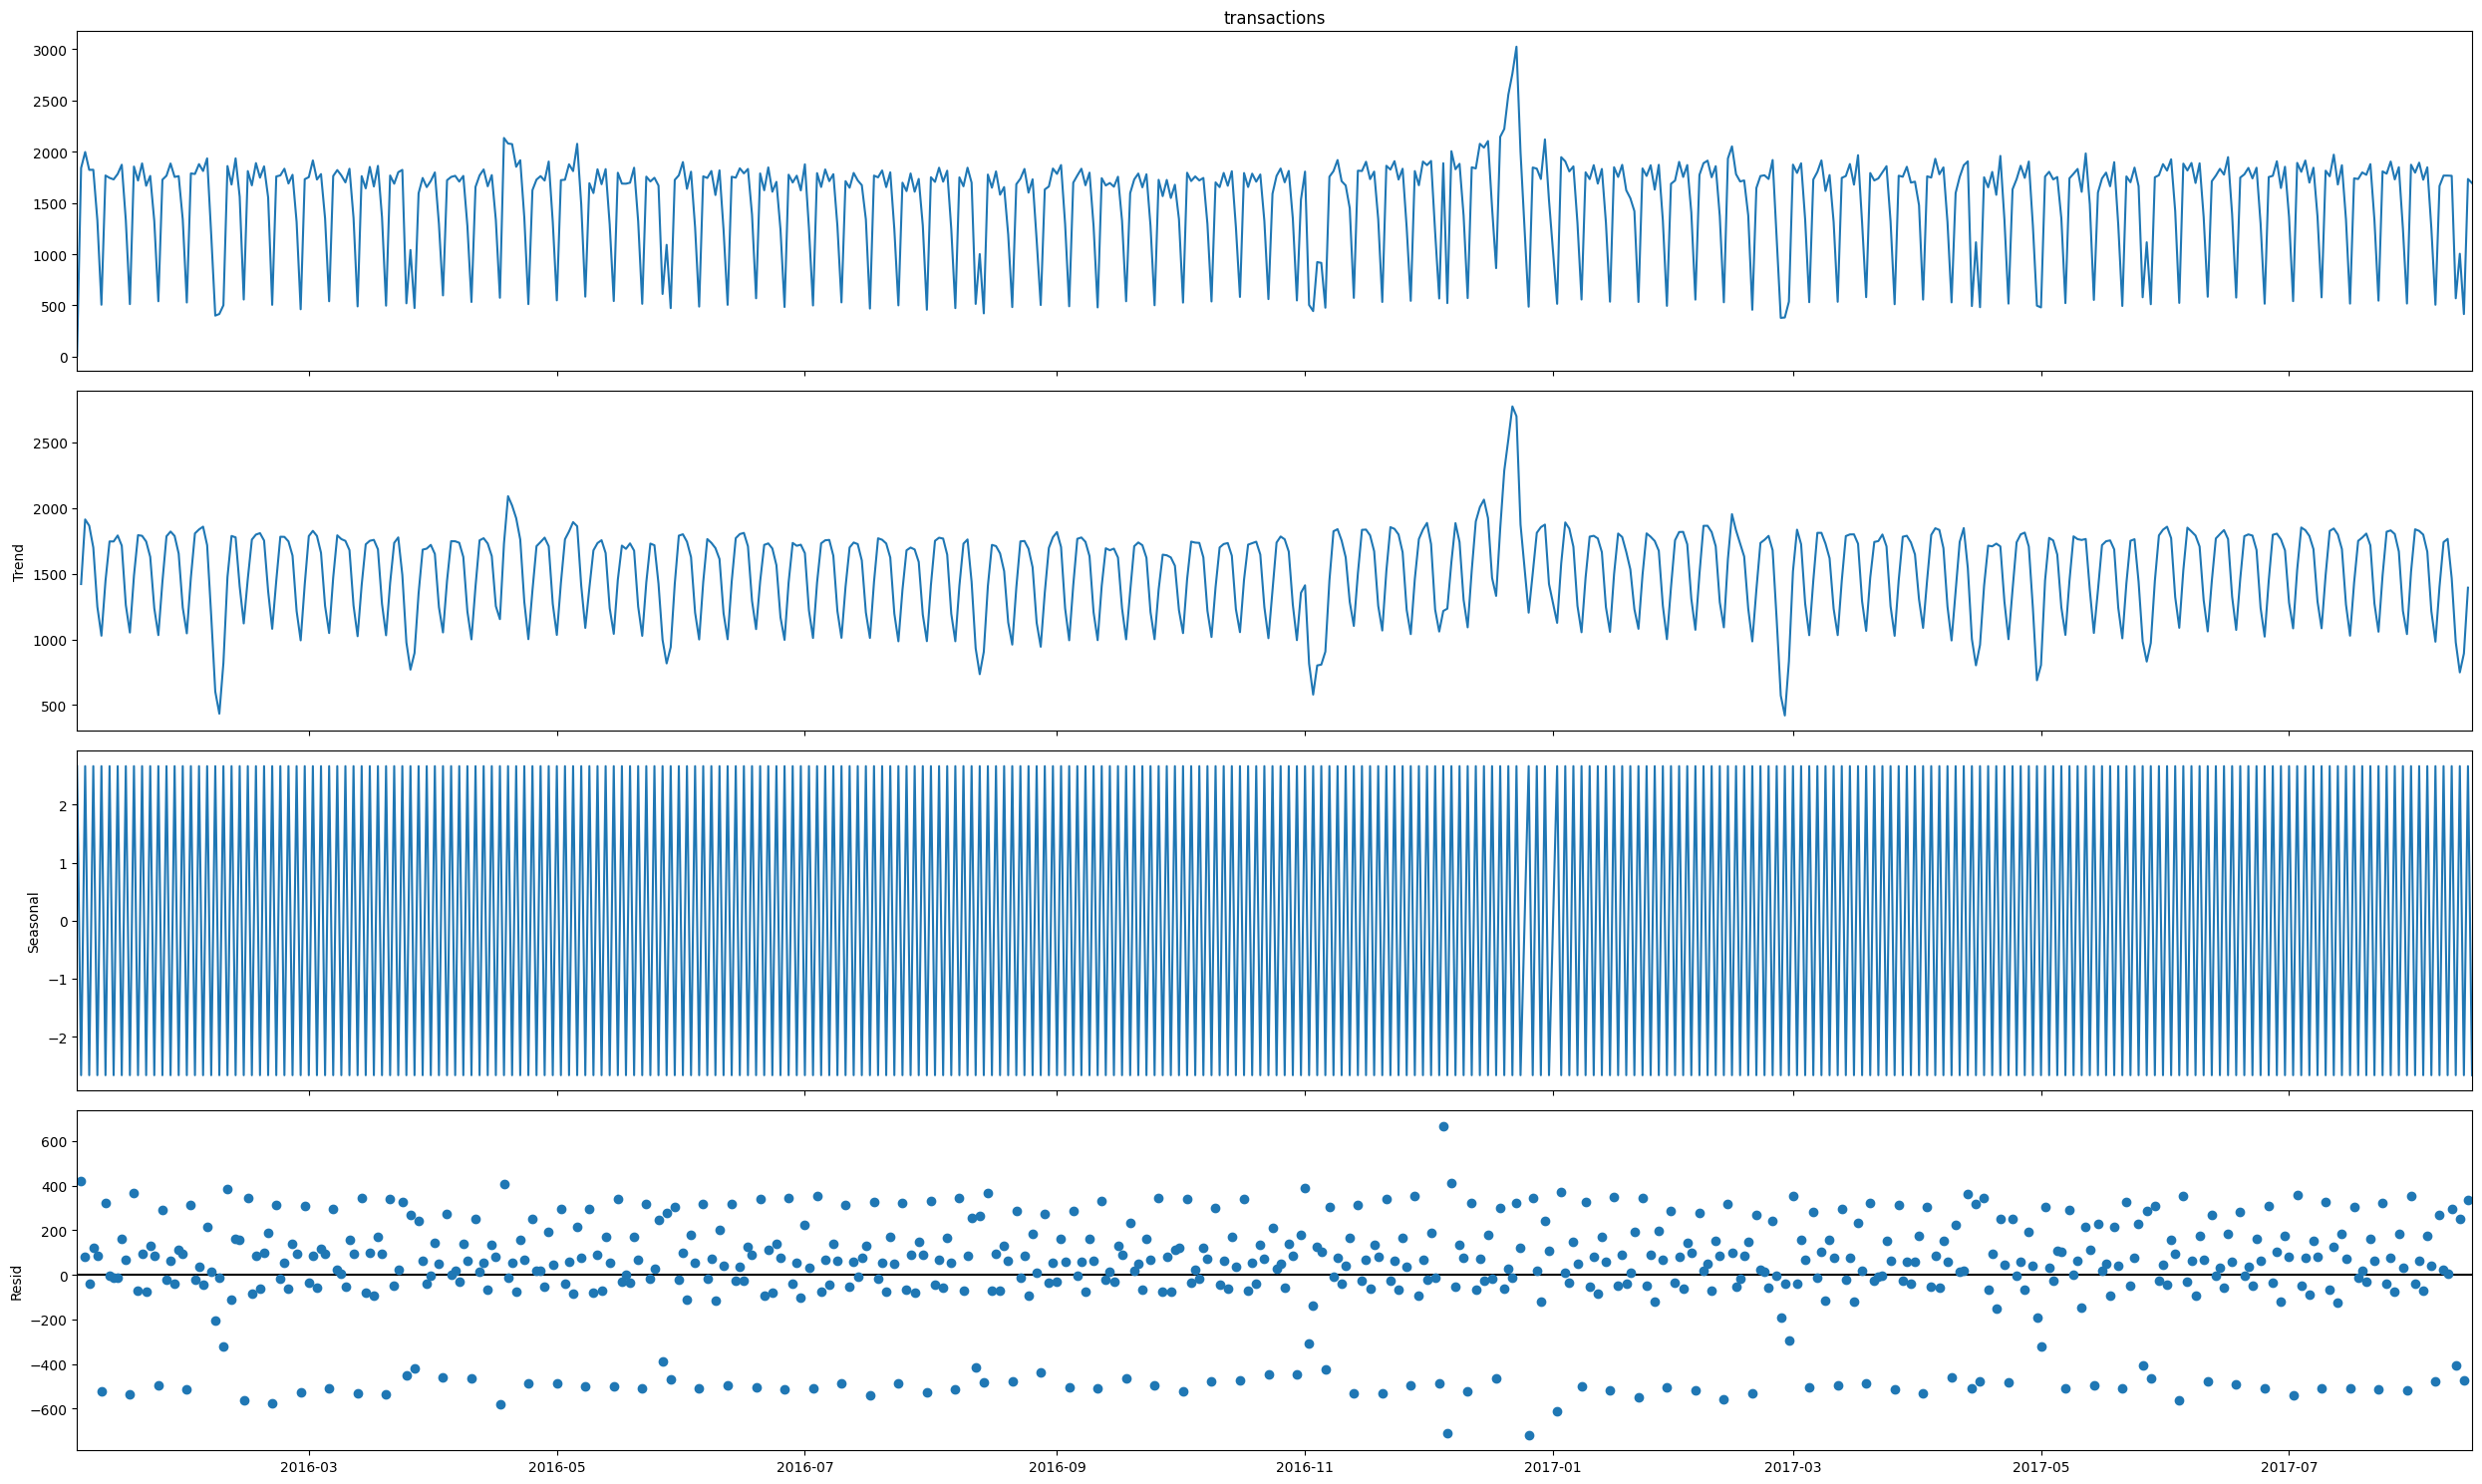

In [35]:
# Decompose Time Series

# Make fig size bigger
plt.rcParams['figure.figsize'] = (25, 15)
# Decompose time series
decomposition = seasonal_decompose(df_transactions_store1_2016_2017['transactions'], model='additive', period=2)
fig = plt.figure()
fig = decomposition.plot()


<ipython-input-36-4252df8f76ed>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_transactions_store1_2017 = df_transactions_store1['2017']


<Figure size 2500x1000 with 0 Axes>

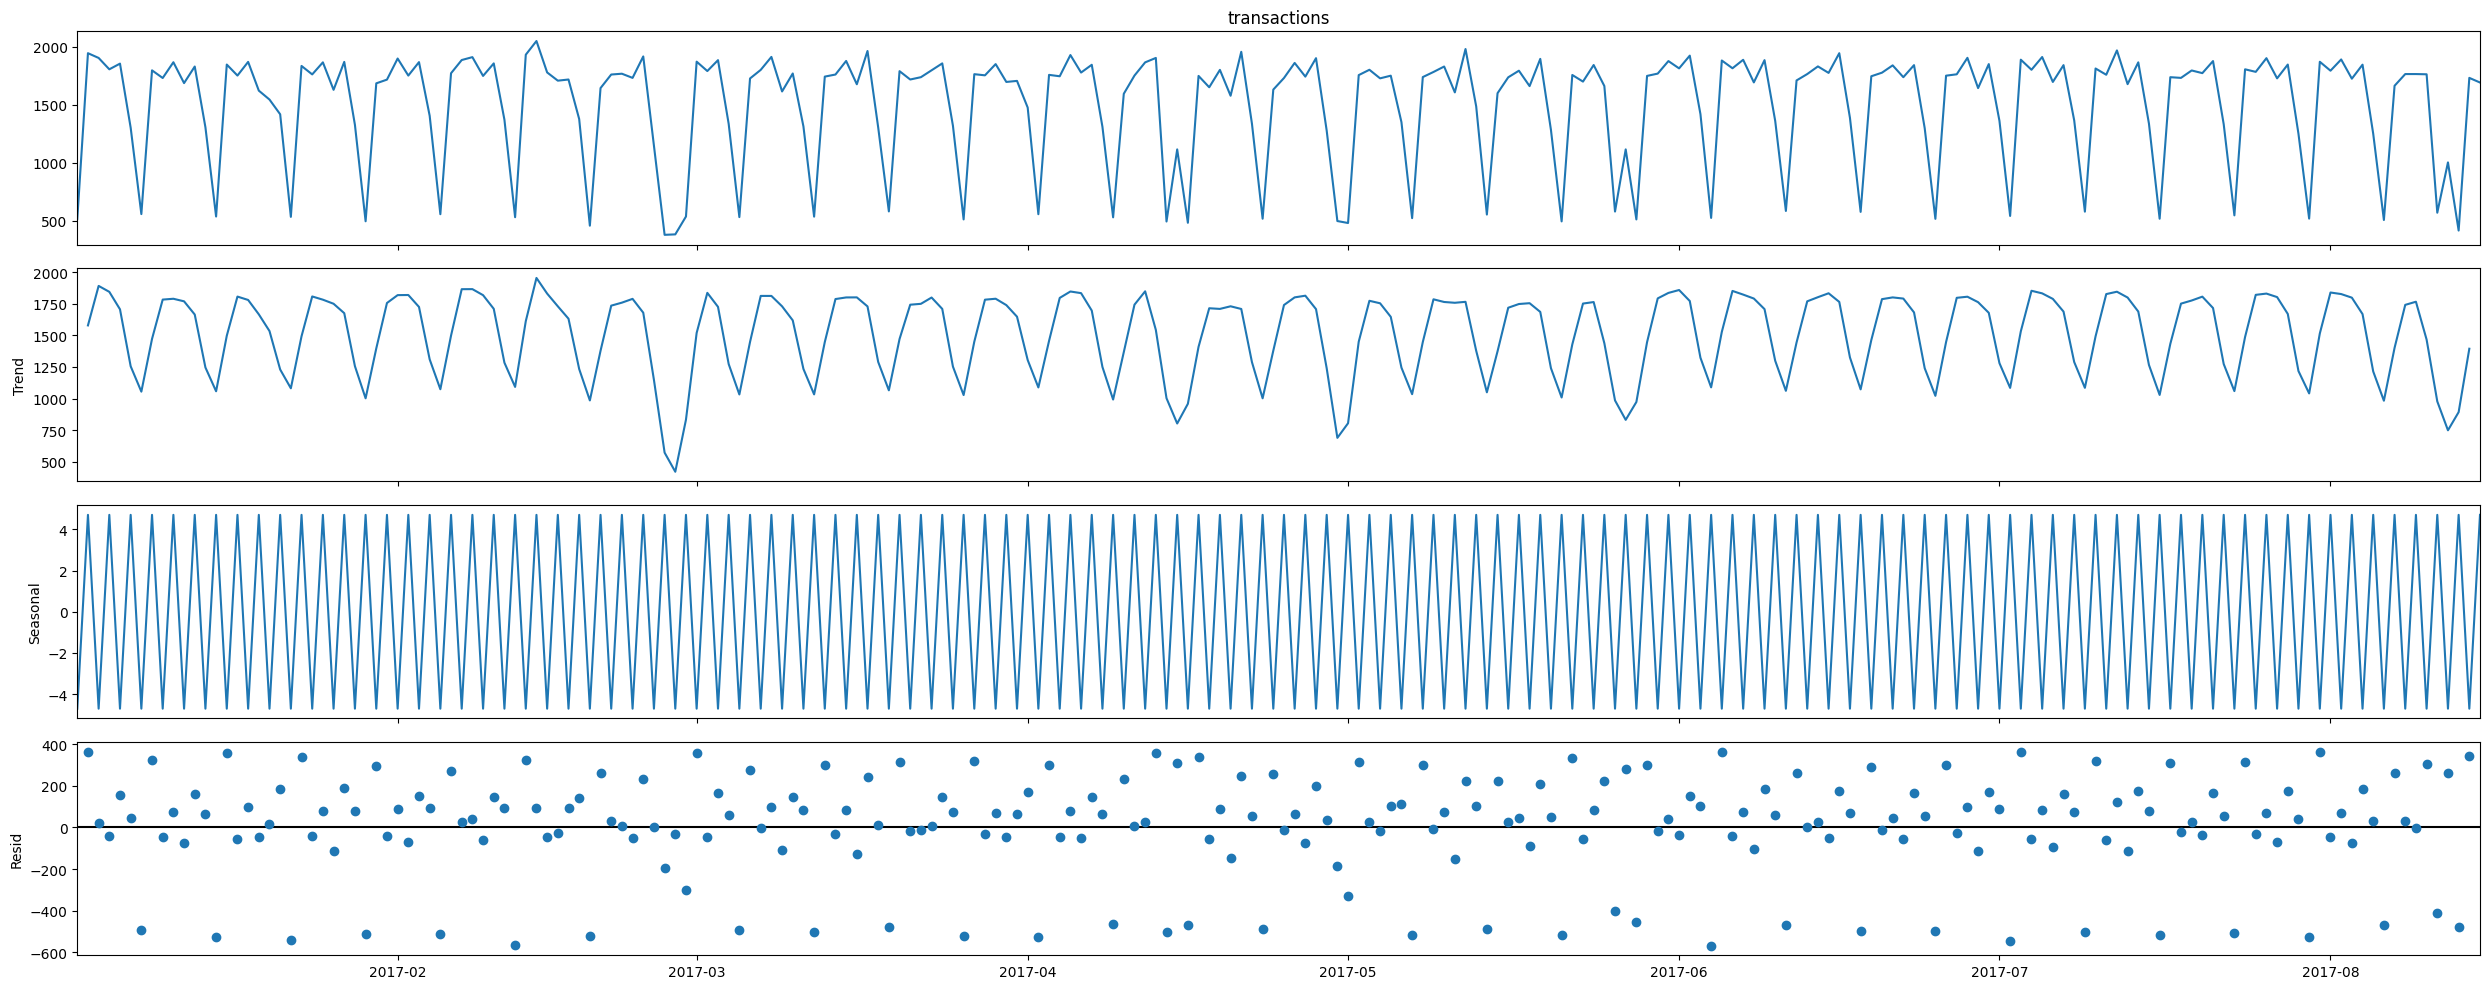

In [36]:
# Decompose Time Series
# Decompose data tahun 2017 saja
df_transactions_store1_2017 = df_transactions_store1['2017']
# Make fig size bigger
plt.rcParams['figure.figsize'] = (25, 10)
# Decompose time series
decomposition = seasonal_decompose(df_transactions_store1_2017['transactions'], model='additive', period=2)
fig = plt.figure()
fig = decomposition.plot()